In [2]:
%load_ext autoreload
%autoreload 2
from project_x.skeleton import *

In [84]:
import scanpy as sc
import matplotlib.pyplot as plt
import mygene
import pandas as pd

# 1) DGE from my pipeline (using dropseq tools)

In [27]:
input_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_matrices/dge_drop_seq/full_matrix/dge.h5ad"
sp_dge = sc.read(input_file)
sc.pp.calculate_qc_metrics(sp_dge, inplace=True)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:386: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


## save matrix

In [ ]:
sub = sp_dge[sp_dge.obs['keep'] == True,]

In [ ]:
output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_greater_2000.h5ad"
sub.write(output_file, compression='gzip')

## plot count distribution

In [ ]:
plt.hist(sp_dge.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

## select range of cells

In [5]:
# lower_lim = sp_dge.obs['total_counts'] > 450
lower_lim = sp_dge.obs['total_counts'] > 10
upper_lim = sp_dge.obs['total_counts'] < 100000
sp_dge.obs['keep'] = lower_lim & upper_lim
print(sum(sp_dge.obs["keep"]))

154173


In [6]:
sub = sp_dge[sp_dge.obs['keep'] == True,]
sub

View of AnnData object with n_obs × n_vars = 154173 × 25482 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'keep'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [ ]:
plt.hist(sub.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

In [ ]:
output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_greater_450_smaller_100000.h5ad"
sub.write(output_file, compression='gzip')

# ------------------------------------------------------------

In [7]:
sc.pp.normalize_total(sub, target_sum=1e4)
sc.pp.log1p(sub)
sc.pp.highly_variable_genes(sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
sub_hvg = sub[:, sub.var.highly_variable]
sc.pp.scale(sub_hvg, max_value=10)
sc.tl.pca(sub_hvg, svd_solver='arpack', n_comps=100)
# sc.pl.pca(sub_hvg)
sc.pp.neighbors(sub_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(sub_hvg)
sc.tl.leiden(sub_hvg)
# sc.pl.umap(sub_hvg, color='leiden')

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)


In [ ]:
u1, u2 = get_umap_data(sub_hvg)
leiden = get_leiden_clustering_data(sub_hvg)

# 2) DGE from my pipeline - first 10,000 (using dropseq tool)

In [ ]:
input_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_10000.h5ad"
dge_10_000 = sc.read(input_file)

In [ ]:
sc.pp.calculate_qc_metrics(dge_10_000, inplace=True)

In [ ]:
sc.pp.normalize_total(dge_10_000, target_sum=1e4)
sc.pp.log1p(dge_10_000)
sc.pp.highly_variable_genes(dge_10_000, min_mean=0.0125, max_mean=3, min_disp=0.5)
dge_10_000_hvg = dge_10_000[:, dge_10_000.var.highly_variable]
dge_10_000_hvg

In [ ]:
sc.pp.scale(dge_10_000_hvg, max_value=10)
sc.tl.pca(dge_10_000_hvg, svd_solver='arpack', n_comps=100)
sc.pl.pca(dge_10_000_hvg)

In [ ]:
sc.pp.neighbors(dge_10_000_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(dge_10_000_hvg)
sc.tl.leiden(dge_10_000_hvg)
sc.pl.umap(dge_10_000_hvg, color='leiden')

# 3) DGE from my pipeline (not using dropseq tools)

In [4]:
input_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_at_my_pip.h5ad"
dge_my_pip = sc.read(input_file)

### calculate QC metrics

In [11]:
sc.pp.calculate_qc_metrics(dge_my_pip, inplace=True)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_qc.py:386: RuntimeWarning: invalid value encountered in true_divide
  return values / sums[:, None]


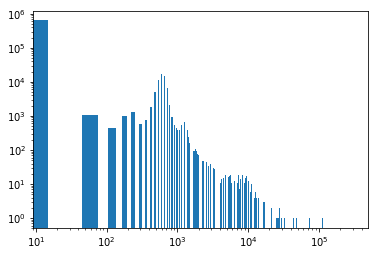

In [9]:
plt.hist(dge_my_pip.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

### perform Normalization, Dimensionality reduction and clustering ('standard settings')
The parameters are not optimized. The focus here is to visually compare datasets.

In [13]:
sc.pp.normalize_total(dge_my_pip_sel, target_sum=1e4)
sc.pp.log1p(dge_my_pip_sel)
sc.pp.highly_variable_genes(dge_my_pip_sel, min_mean=0.0125, max_mean=3, min_disp=0.5)
dge_my_pi_hvg = dge_my_pip_sel[:, dge_my_pip_sel.var.highly_variable]
sc.pp.scale(dge_my_pi_hvg, max_value=10)
sc.tl.pca(dge_my_pi_hvg, svd_solver='arpack', n_comps=100)
# sc.pl.pca(dge_10_000_hvg)
sc.pp.neighbors(dge_my_pi_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(dge_my_pi_hvg)
sc.tl.leiden(dge_my_pi_hvg)
# sc.pl.umap(dge_10_000_hvg, color='leiden')

NameError: name 'dge_my_pip_sel' is not defined

### extract clustering and UMAP data

In [12]:
u1, u2 = get_umap_data(dge_my_pi_hvg)
leiden = get_leiden_clustering_data(dge_my_pip_hvg)

NameError: name 'dge_my_pi_hvg' is not defined

## 3.1) Probing different ranges of total counts per cell
How does slecting cells based on their max_counts_pre_cell change the clustering?

### range 420 to 100,000

In [10]:
lower_lim = dge_my_pip.obs['total_counts'] > 420
upper_lim = dge_my_pip.obs['total_counts'] < 100000
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
mp_1 = dge_my_pip[dge_my_pip.obs['keep'] == True,]

70140


In [13]:
sc.pp.normalize_total(mp_1, target_sum=1e4)
sc.pp.log1p(mp_1)
sc.pp.highly_variable_genes(mp_1, min_mean=0.0125, max_mean=3, min_disp=0.5)
mp_1_hvg = mp_1[:, mp_1.var.highly_variable]

sc.pp.scale(mp_1_hvg, max_value=10)
sc.tl.pca(mp_1_hvg, svd_solver='arpack', n_comps=100)

sc.pp.neighbors(mp_1_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(mp_1_hvg)
sc.tl.leiden(mp_1_hvg)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  warnings.warn(er

In [17]:
u1, u2 = get_umap_data(mp_1_hvg)
leiden = get_leiden_clustering_data(mp_1_hvg)

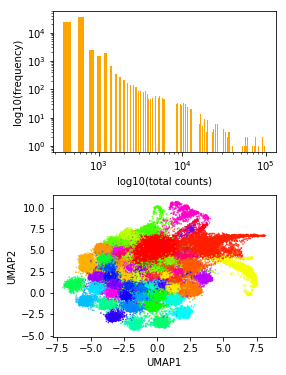

In [20]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].hist(mp_1.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel("log10(frequency)")
axes[0].set_xlabel("log10(total counts)")

axes[1].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[1].set_ylabel("UMAP2")
axes[1].set_xlabel("UMAP1")

plt.savefig('my_pip_no_dropseqtools_420_to_100000.png', dpi=500, bbox_inches='tight')

### range 420 to 1000

In [11]:
lower_lim = dge_my_pip.obs['total_counts'] > 420
upper_lim = dge_my_pip.obs['total_counts'] < 1000
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
mp_2 = dge_my_pip[dge_my_pip.obs['keep'] == True,]

61326


In [14]:
sc.pp.normalize_total(mp_2, target_sum=1e4)
sc.pp.log1p(mp_2)
sc.pp.highly_variable_genes(mp_2, min_mean=0.0125, max_mean=3, min_disp=0.5)
mp_2_hvg = mp_2[:, mp_2.var.highly_variable]

sc.pp.scale(mp_2_hvg, max_value=10)
sc.tl.pca(mp_2_hvg, svd_solver='arpack', n_comps=100)

sc.pp.neighbors(mp_2_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(mp_2_hvg)
sc.tl.leiden(mp_2_hvg)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/numba/typed_passes.py:292: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  warnings.warn(errors.NumbaPerformanceWarning(msg,


In [21]:
u1, u2 = get_umap_data(mp_2_hvg)
leiden = get_leiden_clustering_data(mp_2_hvg)

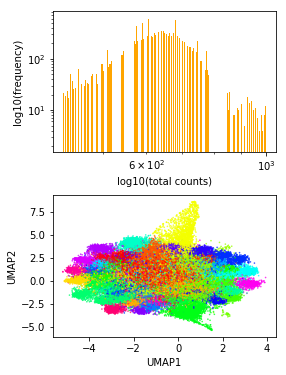

In [23]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].hist(mp_2.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel("log10(frequency)")
axes[0].set_xlabel("log10(total counts)")

axes[1].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[1].set_ylabel("UMAP2")
axes[1].set_xlabel("UMAP1")

plt.savefig('my_pip_no_dropseqtools_420_to_1000.png', dpi=500, bbox_inches='tight')

### range 1,800 to 6,000

In [35]:
lower_lim = dge_my_pip.obs['total_counts'] > 1800
upper_lim = dge_my_pip.obs['total_counts'] < 6000
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
mp_3 = dge_my_pip[dge_my_pip.obs['keep'] == True,]

2043


In [36]:
sc.pp.normalize_total(mp_3, target_sum=1e4)
sc.pp.log1p(mp_3)
sc.pp.highly_variable_genes(mp_3, min_mean=0.0125, max_mean=3, min_disp=0.5)
mp_3_hvg = mp_3[:, mp_3.var.highly_variable]

sc.pp.scale(mp_3_hvg, max_value=10)
sc.tl.pca(mp_3_hvg, svd_solver='arpack', n_comps=100)

sc.pp.neighbors(mp_3_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(mp_3_hvg)
sc.tl.leiden(mp_3_hvg)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [53]:
u1, u2 = get_umap_data(mp_3_hvg)
leiden = get_leiden_clustering_data(mp_3_hvg)

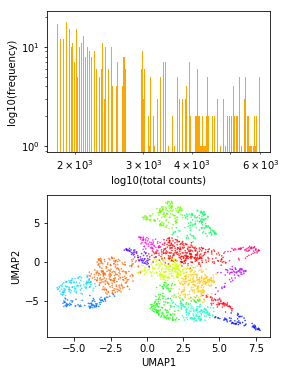

In [54]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].hist(mp_3.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel("log10(frequency)")
axes[0].set_xlabel("log10(total counts)")

axes[1].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[1].set_ylabel("UMAP2")
axes[1].set_xlabel("UMAP1")

plt.savefig('my_pip_no_dropseqtools_1800_to_6000.png', dpi=500, bbox_inches='tight')

In [40]:
output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_1800_6000.h5ad"
mp_3.write(output_file, compression='gzip')

## 3.2) gene thresholding
How does slecting cells based on their max_num_expr_genes change the clustering?

In [85]:
mp_3.obs['accepted'] = gene_thresholding(mp_3, 1500)
sum(mp_3.obs['accepted'])
mp_3_1 = mp_3[mp_3.obs['accepted'] == True,]

sc.pp.normalize_total(mp_3_1, target_sum=1e4)
sc.pp.log1p(mp_3_1)
sc.pp.highly_variable_genes(mp_3_1, min_mean=0.0125, max_mean=3, min_disp=0.5)
mp_3_1_hvg = mp_3_1[:,mp_3_1.var.highly_variable]

sc.pp.scale(mp_3_1_hvg, max_value=10)
sc.tl.pca(mp_3_1_hvg, svd_solver='arpack', n_comps=100)

sc.pp.neighbors(mp_3_1_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(mp_3_1_hvg)
sc.tl.leiden(mp_3_1_hvg)

In [88]:
u1, u2 = get_umap_data(mp_3_1_hvg)
leiden = get_leiden_clustering_data(mp_3_1_hvg)

NameError: name 'mp_3_1' is not defined

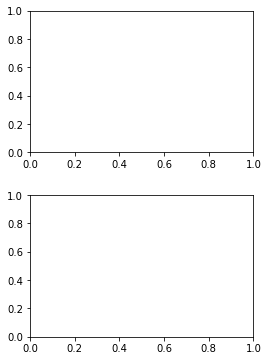

In [52]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].hist(mp_3_1.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel("log10(frequency)")
axes[0].set_xlabel("log10(total counts)")

axes[1].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[1].set_ylabel("UMAP2")
axes[1].set_xlabel("UMAP1")

# plt.savefig('my_pip_no_dropseqtools_1800_to_6000.png', dpi=500, bbox_inches='tight')

In [37]:
lower_lim = dge_my_pip.obs['total_counts'] > 1800
upper_lim = dge_my_pip.obs['total_counts'] < 15000
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
mp_4 = dge_my_pip[dge_my_pip.obs['keep'] == True,]

3460


In [38]:
sc.pp.normalize_total(mp_4, target_sum=1e4)
sc.pp.log1p(mp_4)
sc.pp.highly_variable_genes(mp_4, min_mean=0.0125, max_mean=3, min_disp=0.5)
mp_4_hvg = mp_4[:, mp_4.var.highly_variable]

sc.pp.scale(mp_4_hvg, max_value=10)
sc.tl.pca(mp_4_hvg, svd_solver='arpack', n_comps=100)

sc.pp.neighbors(mp_4_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(mp_4_hvg)
sc.tl.leiden(mp_4_hvg)

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:298: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(data)
/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [39]:
u1, u2 = get_umap_data(mp_4_hvg)
leiden = get_leiden_clustering_data(mp_4_hvg)

Text(0.5, 0, 'UMAP1')

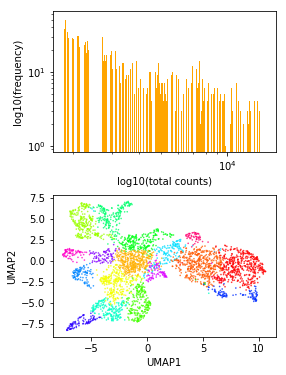

In [40]:
fig, axes = plt.subplots(2,1, figsize = (4,6))

fig.subplots_adjust(hspace=0.3)

axes[0].hist(mp_4.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[0].set_yscale('log')
axes[0].set_xscale('log')
axes[0].set_ylabel("log10(frequency)")
axes[0].set_xlabel("log10(total counts)")

axes[1].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[1].set_ylabel("UMAP2")
axes[1].set_xlabel("UMAP1")

# plt.savefig('my_pip_no_dropseqtools_1800_to_6000.png', dpi=500, bbox_inches='tight')

##  3.3) subsettinng using only cells from original matrix
create a sub matrix of my dge matrix only using the cells that are also in the original matrix  
How does this change the clustering?

### subset my DGE matrix

In [22]:
match = [0]*len(dge_my_pip.obs_names)
i = 0
for cell_name in dge_my_pip.obs_names:
    if cell_name in dge_orig_cor.obs_names:
        match[i] = 1
    i += 1
    
# sum(match)
dge_my_pip.obs['match'] = match

sub_cells_match = dge_my_pip[dge_my_pip.obs['match'] == True,]

### add counts of orig DGE matrix per cell in correct order

In [27]:
bcs_my_pip = sub_cells_match.obs_names.tolist()
orig_counts_ordered = [0]*len(dge_orig_cor.obs)

for bc, count in zip(dge_orig_cor.obs_names, dge_orig_cor.obs["total_counts"]):
    i = bcs_my_pip.index(bc)
    orig_counts_ordered[i] = count
    
#     print(bc + " : " + str(count))
sub_cells_match.obs["orig_counts"] = orig_counts_ordered

### add no_genes_pre_cell of orig DGE matrix to my matrix in correct order

In [29]:
bcs_my_pip = sub_cells_match.obs_names.tolist()
orig_counts_ordered = [0]*len(dge_orig_cor.obs)

for bc, count in zip(dge_orig_cor.obs_names, dge_orig_cor.obs["n_genes_by_counts"]):
    i = bcs_my_pip.index(bc)
    orig_counts_ordered[i] = count
    
#     print(bc + " : " + str(count))
sub_cells_match.obs["orig_genes_per_cell"] = orig_counts_ordered

### perform Normalization, Dimensionality reduction and clustering ('standard settings')
The parameters are not optimized. The focus here is to visually compare datasets.  

IMPORTANT: Order matters
First cells have been selected based on whether they are in the orignal DGE.
Then dimensionality reduciton, clustering etc. has beeen performed.

As expected, the results vary compared to when my whole dataset is subjected to DR, clustering etc and then cells are picked out.

In [16]:
sc.pp.normalize_total(sub_cells_match, target_sum=1e4)
sc.pp.log1p(sub_cells_match)
sc.pp.highly_variable_genes(sub_cells_match, min_mean=0.0125, max_mean=3, min_disp=0.5)
sub_cells_match_hvg = sub_cells_match[:, sub_cells_match.var.highly_variable]
sc.pp.scale(sub_cells_match_hvg, max_value=10)
sc.tl.pca(sub_cells_match_hvg, svd_solver='arpack', n_comps=100)
# sc.pl.pca(dge_10_000_hvg)
sc.pp.neighbors(sub_cells_match_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(sub_cells_match_hvg)
sc.tl.leiden(sub_cells_match_hvg)
# sc.pl.umap(dge_10_000_hvg, color='leiden')

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [18]:
u1, u2 = get_umap_data(sub_cells_match_hvg)
leiden = get_leiden_clustering_data(sub_cells_match_hvg)u1

Text(0.5, 0, 'total counts')

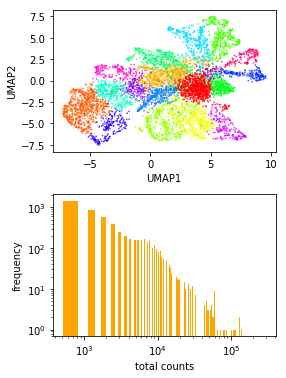

In [25]:
fig, axes = plt.subplots(2,1, figsize = (4,6))
fig.subplots_adjust(hspace=0.3)
axes[0].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[0].set_ylabel("UMAP2")
axes[0].set_xlabel("UMAP1")

axes[1].hist(sub_cells_match.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel("frequency")
axes[1].set_xlabel("total counts")

# plt.savefig('my_pip_dropseqtools.png', dpi=500, bbox_inches='tight')

### comparing my data with Cell Ranger data
How do the cells compare to each other in my dataset vs. the original?

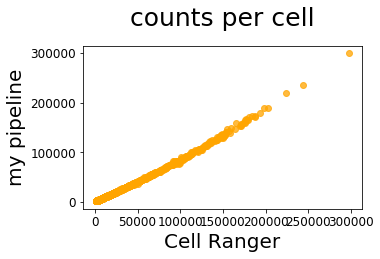

In [19]:
fig, axes = plt.subplots(1,1, figsize = (5,3))

fig.subplots_adjust(hspace=0.3)
axes.set_title("counts per cell", size=25, pad=20)

axes.scatter(sub_cells_match.obs["orig_counts"], sub_cells_match.obs["total_counts"], color="orange", 
            edgecolor=None, linewidth=1, alpha=0.75)
axes.set_ylabel("my pipeline", size=20)
axes.set_xlabel("Cell Ranger", size=20)
axes.tick_params(labelsize=12)

# plt.savefig('counts_compared.png', dpi=500, bbox_inches='tight')

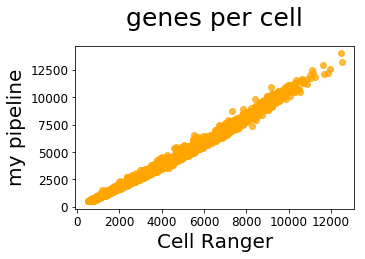

In [30]:
fig, axes = plt.subplots(1,1, figsize = (5,3))

fig.subplots_adjust(hspace=0.3)
axes.set_title("genes per cell", size=25, pad=20)

axes.scatter(sub_cells_match.obs["orig_genes_per_cell"], sub_cells_match.obs["n_genes_by_counts"], color="orange", 
            edgecolor=None, linewidth=1, alpha=0.75)
axes.set_ylabel("my pipeline", size=20)
axes.set_xlabel("Cell Ranger", size=20)

axes.tick_params(labelsize=12)

# plt.savefig('genes_per_cell_compared.png', dpi=500, bbox_inches='tight')

### visualize where barcodes went

In [32]:
# create a subset of cells of my data based on the range of cell counts of the original data

lower_lim = dge_my_pip.obs['total_counts'] > 1556
upper_lim = dge_my_pip.obs['total_counts'] < 6056
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
sub_new = dge_my_pip[dge_my_pip.obs['keep'] == True,]

2504


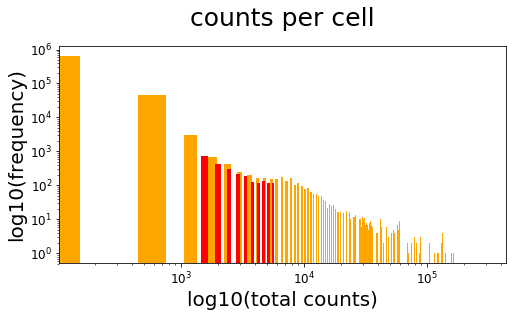

In [33]:
fig, axes = plt.subplots(1,1, figsize = (8,4))

fig.subplots_adjust(hspace=0.3)
axes.set_title("counts per cell", size=25, pad=20)

axes.hist(dge_my_pip.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes.hist(sub_new.obs['total_counts'], 10, histtype='bar', rwidth=0.5, align='left', color="red")

axes.set_yscale('log')
axes.set_xscale('log')
axes.set_ylabel("log10(frequency)", size=20)
axes.set_xlabel("log10(total counts)", size=20)

axes.tick_params(labelsize=12)


# plt.savefig('overlaying_2.png', dpi=500, bbox_inches='tight')

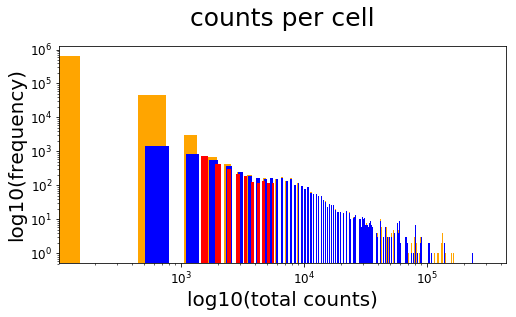

In [34]:
fig, axes = plt.subplots(1,1, figsize = (8, 4))

fig.subplots_adjust(hspace=0.3)
axes.set_title("counts per cell", size=25, pad=20)

axes.hist(dge_my_pip.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes.hist(sub_cells_match.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="blue")
axes.hist(sub_new.obs['total_counts'], 10, histtype='bar', rwidth=0.5, align='left', color="red")

axes.set_yscale('log')
axes.set_xscale('log')
axes.set_ylabel("log10(frequency)", size=20)
axes.set_xlabel("log10(total counts)", size=20)

axes.tick_params(labelsize=12)


# plt.savefig('overlaying_3.png', dpi=500, bbox_inches='tight')

# 4) Original DGE matrix
This is the matrix that has been produced with Cell Ranger by Che Wei

## load original matrix

In [7]:
input_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_matrices/dge_original/dge_orig.h5ad"
dge_orig = sc.read(input_file)
dge_orig_cor = correct_barcode_names(dge_orig)

### convert gene_symbols to gene_ids

In [41]:
# the conversion has been done using the utility functions below
# gene_symbols for which no gene_id could be found have been named "empty".
# Those that could not be assigned are only about 250 and far less compared to other tools out there

handler = open("/fast/AG_Ohler/manuel/che_wei_data/orig_gene_names_ids_improved.txt", 'r')
gene_ids = [gene.split('\n')[0] for gene in handler.readlines()]
dge_orig_cor.var_names = gene_ids

## save corrected original matrix

In [48]:
output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_orig_cor.h5ad"
dge_orig_cor.write(output_file, compression='gzip')

## QC metrics

In [9]:
sc.pp.calculate_qc_metrics(dge_orig_cor, inplace=True)

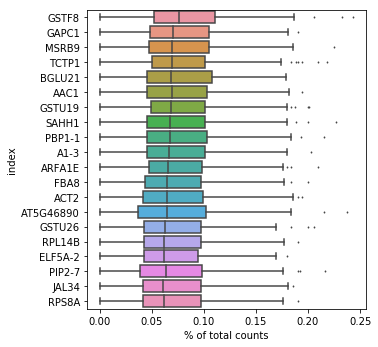

In [87]:
sc.pl.highest_expr_genes(dge_orig_cor, n_top=20)

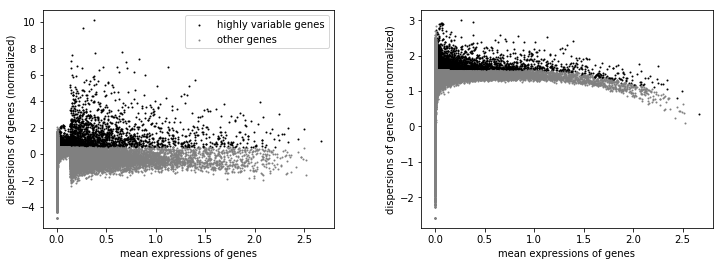

In [88]:
sc.pl.highly_variable_genes(dge_orig_cor)

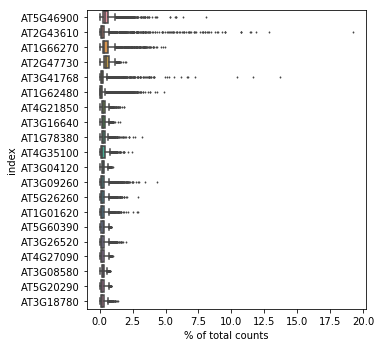

In [91]:
sc.pl.highest_expr_genes(mp_3, n_top=20)

# ----------------------
used for extracting gene symbols and gene ids so that I can work with them on local machine

In [107]:
handler = open("/fast/AG_Ohler/manuel/projects/project_x/orig_gene_names.txt", 'w')
for gene_name in dge_orig_cor.var_names.tolist():
    handler.write(gene_name)
    handler.write('\n')
handler.close()

handler_2 = open("/fast/AG_Ohler/manuel/projects/project_x/my_pip_gene_names.txt", 'w')
for gene_name in dge_my_pip.var_names.tolist():
    handler_2.write(gene_name)
    handler_2.write('\n')
handler.close()

# ----------------------

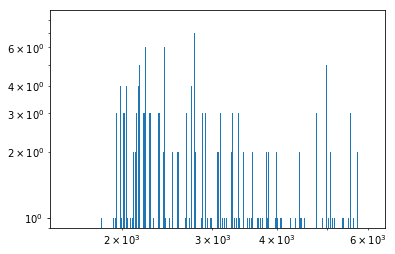

In [78]:
plt.hist(dge_orig_cor.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

In [57]:
sc.pp.normalize_total(dge_orig, target_sum=1e4)
sc.pp.log1p(dge_orig)
sc.pp.highly_variable_genes(dge_orig, min_mean=0.0125, max_mean=3, min_disp=0.5)
dge_orig_hvg = dge_orig[:, dge_orig.var.highly_variable]
sc.pp.scale(dge_orig_hvg, max_value=10)
sc.tl.pca(dge_orig_hvg, svd_solver='arpack', n_comps=100)
# sc.pl.pca(dge_orig_hvg)
sc.pp.neighbors(dge_orig_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(dge_orig_hvg)
sc.tl.leiden(dge_orig_hvg)
# sc.pl.umap(dge_orig_hvg, color='leiden')

/home/mneuman/anaconda3/envs/project_x/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:909: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [59]:
u1_orig, u2_orig = get_umap_data(dge_orig_hvg)
leiden_orig = get_leiden_clustering_data(dge_orig_hvg)

Text(0.5, 0, 'total counts')

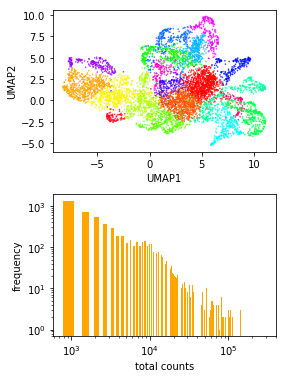

In [60]:
fig, axes = plt.subplots(2,1, figsize = (4,6))
fig.subplots_adjust(hspace=0.3)
axes[0].scatter(u1_orig, u2_orig, s=0.4, c=leiden_orig, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[0].set_ylabel("UMAP2")
axes[0].set_xlabel("UMAP1")

axes[1].hist(dge_orig.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel("frequency")
axes[1].set_xlabel("total counts")

# plt.savefig('my_pip_dropseqtools.png', dpi=500, bbox_inches='tight')

# 5) evaluate clustering - orig vs my matrix

In [132]:
output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_orig_hvg.h5ad"
dge_orig_hvg.write(output_file, compression='gzip')

output_file = "/fast/AG_Ohler/manuel/che_wei_data/data_2/dge_my_hvg.h5ad"
mp_3.write(output_file, compression='gzip')

In [63]:
dge_orig_cor.var_names

Index(['AT1G01010', 'AT1G01020', 'AT1G03987', 'AT1G01030', 'AT1G01040',
       'AT1G03993', 'AT1G01046', 'AT1G01050', 'AT1G03997', 'AT1G01060',
       ...
       'empty', 'ATCG01250', 'ATCG01260', 'empty', 'empty', 'ATCG01290',
       'empty', 'empty', 'empty', 'empty'],
      dtype='object', length=32835)

In [73]:
dge_orig_hvg

AnnData object with n_obs × n_vars = 6464 × 4578 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [65]:
mp_3.var_names

Index(['AT5G26260', 'AT2G36160', 'AT1G79150', 'AT5G42980', 'AT4G01850',
       'AT2G39210', 'AT3G48340', 'AT2G13100', 'AT1G15400', 'AT1G04820',
       ...
       'AT4G19340', 'AT1G20710', 'AT1G30795', 'AT3G16660', 'AT2G22810',
       'AT2G10608', 'AT3G57690', 'AT1G20240', 'AT1G29660', 'AT5G51720'],
      dtype='object', name='index', length=25174)

In [74]:
mp_3_hvg

AnnData object with n_obs × n_vars = 2043 × 2320 
    obs: 'match', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'keep', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [ ]:
### how many genes are in both datasets?

In [70]:
count = 0
for gene in mp_3_hvg.var_names:
    if gene in dge_orig_hvg.var_names:
        count += 1
print(count)

1386


In [86]:
sc.tl.rank_genes_groups(dge_orig_hvg, 'leiden', method='t-test')
sc.tl.rank_genes_groups(mp_3_hvg, 'leiden', method='t-test')

In [92]:
orig_mg = pd.DataFrame(dge_orig_hvg.uns['rank_genes_groups']['names'])
my_mg = pd.DataFrame(mp_3_hvg.uns['rank_genes_groups']['names'])

In [93]:
orig_mg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,AT5G46890,AT5G18380,AT1G25275,AT2G43535,AT2G37600,AT4G23800,AT2G46740,AT1G10682,AT1G05260,AT1G12080,empty,AT2G04170,AT1G21310,ATCG01130,AT1G52070,AT3G28550,AT3G60530,AT5G04080,AT2G04025
1,AT1G66270,AT5G02960,AT5G24070,AT5G23820,AT3G03920,AT1G50490,AT4G30280,AT2G02130,AT5G65390,AT5G56540,AT3G20370,AT2G24260,AT4G20260,empty,AT5G60530,AT3G54580,AT4G22230,AT3G59370,AT2G01420
2,AT3G16420,AT3G22230,AT5G60530,AT5G02380,AT5G08180,AT4G31840,AT4G15160,AT5G56540,AT1G62480,AT1G55330,AT1G58270,AT1G19360,AT2G45180,ATCG00470,AT2G43610,AT5G05500,AT1G28290,AT1G62380,AT4G34970
3,AT5G46900,AT1G09690,AT1G12740,AT1G45145,AT5G22650,AT2G37600,AT3G28740,AT1G75750,AT4G34050,AT4G26320,AT1G21750,AT1G67330,AT1G12090,empty,AT5G54370,AT1G23720,AT5G42020,AT5G40980,AT1G04610
4,AT3G16460,AT2G37190,AT5G10130,AT5G62340,AT3G27850,AT3G61110,AT5G45280,AT4G11210,AT2G47930,AT2G13820,AT1G04040,AT2G35610,AT5G13930,ATCG00740,AT1G78850,AT2G36830,AT1G03870,AT2G45470,AT1G78520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AT2G46140,AT5G27120,AT3G47380,AT4G16141,AT4G27950,AT5G47700,AT1G67330,AT1G44608,AT3G16570,AT1G32100,AT3G07570,AT1G77130,AT1G22530,AT2G25210,AT5G57800,AT3G21180,AT5G40330,AT2G40480,AT5G59150
96,AT1G72370,AT5G28640,AT5G44380,AT4G36500,AT1G72730,AT4G33270,AT3G04720,AT3G59370,AT5G25890,AT5G54160,AT1G05660,AT3G07570,AT3G50640,ATMG00285,AT5G61820,AT2G01540,AT5G62280,AT5G06850,AT1G76950
97,AT3G44860,AT1G79075,AT1G52910,AT5G66650,AT3G04840,AT3G14190,AT3G46280,AT5G40980,AT4G37470,AT2G20750,AT5G19230,AT1G76240,AT1G17745,AT2G07715,AT1G26820,AT5G43350,AT4G14750,AT5G01610,AT4G34950
98,AT2G25810,AT5G03850,AT4G25900,AT5G19340,ATCG01130,AT3G04400,AT4G38400,AT3G16330,AT3G43800,AT5G08370,AT4G30190,AT3G05170,AT2G29750,ATMG00510,AT4G25900,AT1G08990,AT5G25830,AT5G21105,AT4G27654


In [97]:
my_mg

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,AT1G09200,AT5G02380,AT2G18980,AT3G12965,AT1G10682,AT4G19030,AT1G12080,AT3G48340,AT1G76680,AT5G60530,AT5G17820,AT2G07751,AT1G21310,AT4G31840,AT2G36830,AT3G28550
1,AT5G65360,AT2G43535,AT4G22214,AT3G44750,AT5G56540,AT5G45280,AT3G13520,AT3G15950,AT1G17180,AT1G52070,AT3G28550,AT2G07698,AT4G20260,AT4G23800,AT1G05260,AT2G07698
2,AT5G22880,AT2G41800,AT1G54000,AT4G25630,AT2G02130,AT4G15160,AT2G13820,AT3G20370,AT1G14870,AT5G24070,AT2G36830,ATCG01130,AT3G61430,AT1G50490,AT2G44790,AT4G30170
3,AT5G59690,AT1G27730,AT3G20370,AT5G62340,AT1G20440,AT5G02260,AT5G56540,AT4G30170,AT1G09070,AT1G78850,AT5G05500,ATMG00020,AT5G40450,AT5G16250,AT4G11290,AT2G07751
4,AT1G07820,AT5G23820,AT4G30170,AT1G79075,AT3G13520,AT2G46740,AT1G20440,AT3G19390,AT1G45145,AT1G74020,AT3G54580,ATCG00790,AT2G45180,AT2G25060,AT2G37170,AT3G01190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AT4G37210,AT3G19380,AT5G07780,AT5G66780,AT4G17220,AT1G12110,AT1G51950,AT1G74020,AT2G26530,AT2G15220,AT3G18560,AT5G26742,AT1G60710,AT2G07725,AT3G23800,AT5G64100
96,AT2G07690,AT2G46950,AT2G46240,ATMG00516,AT4G20260,AT2G37640,AT3G19370,AT2G37640,AT5G11740,AT1G51470,AT4G37530,AT1G54690,AT4G21830,AT3G22900,AT4G23400,AT2G20670
97,AT2G40260,AT5G51470,AT5G63600,AT2G29680,AT2G37180,AT3G16400,AT5G02640,AT5G64100,AT4G36010,AT4G20860,AT2G24980,AT3G16150,AT1G66725,AT5G47500,AT5G04120,AT5G19230
98,AT4G20940,AT2G39980,AT5G65690,AT1G27950,AT5G57685,AT1G14870,AT5G47370,AT3G57020,AT2G19800,AT2G34930,AT5G06640,ATCG01230,AT1G73330,AT1G44110,AT4G24060,AT5G01750


In [130]:
get_matches(my_mg, orig_mg)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [129]:
def get_number_matching_genes(df_query_col, df_ref_col):
    """for a column 'df_query_col' of a dataframe (containing gene_ids), find how many
    matching gene_ids can be found in anoter column 'df_ref_col' of a dataframe"""
    
    i = 0
    for gene in df_query_col:
        if gene in df_ref_col:
            i += 1
    
    return i


def get_best_matching_cluster(df_query_col, df_ref):
    """for a column 'df_query_col' of a dataframe (containing gene_ids), get the number of
    matching gene_ids in every column of the dataframe 'df_ref'"""
    
    matches = [0]*len(df_ref.columns)
    
    for clus_no in range(len(df_ref.columns)):
        matches[clus_no] = get_number_matching_genes(df_query_col, df_ref.loc[:,str(clus_no)])

    return matches


def get_matches(df_query, df_ref):
    """for all columns in df_query get the number of matching gene_ids in every 
    column of the dataframe 'df_ref'"""
    
    clus_matches = [0]*len(df_query.columns)
    
    for clus_no in range(len(df_query.columns)):
        clus_matches[clus_no] = get_best_matching_cluster(df_query.loc[:,str(clus_no)], df_ref)
    
    return clus_matches

In [25]:
sub_cells_match_less_6000 = sub_cells_match[sub_cells_match.obs['total_counts'] <= 6000,]

Text(0.5, 0, 'Cell Ranger')

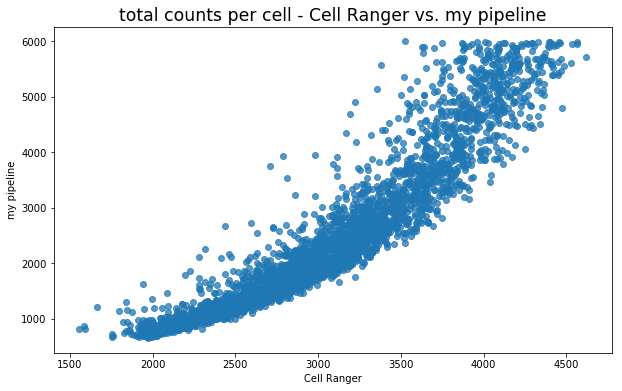

In [26]:
fig, axes = plt.subplots(1,1, figsize = (10,6))

fig.subplots_adjust(hspace=0.3)
axes.set_title("total counts per cell - Cell Ranger vs. my pipeline", size='xx-large')

axes.scatter(sub_cells_match_less_6000.obs["orig_counts"], sub_cells_match_less_6000.obs["total_counts"], cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes.set_ylabel("my pipeline")
axes.set_xlabel("Cell Ranger")

# plt.savefig('my_pip_vs_cell_ranger.png', dpi=500, bbox_inches='tight')

## the same comparision when using drop-seq tool

In [28]:
# first create a sub matrix only containing the reads in the original matrix

match = [0]*len(sp_dge.obs_names)
i = 0
for cell_name in sp_dge.obs_names:
    if cell_name in dge_orig_cor.obs_names:
        match[i] = 1
    i += 1
    
# sum(match)
sp_dge.obs['match'] = match

sub_cells_match_drop = sp_dge[sp_dge.obs['match'] == True,]

In [29]:
# order the original dataset in the same way as my dataset

bcs_my_pip = sub_cells_match_drop.obs_names.tolist()
orig_counts_ordered = [0]*len(dge_orig_cor.obs)

for bc, count in zip(dge_orig_cor.obs_names, dge_orig_cor.obs["total_counts"]):
    i = bcs_my_pip.index(bc)
    orig_counts_ordered[i] = count
    
#     print(bc + " : " + str(count))
sub_cells_match_drop.obs["orig_counts"] = orig_counts_ordered

Trying to set attribute `.obs` of view, copying.


Text(0.5, 0, 'Cell Ranger')

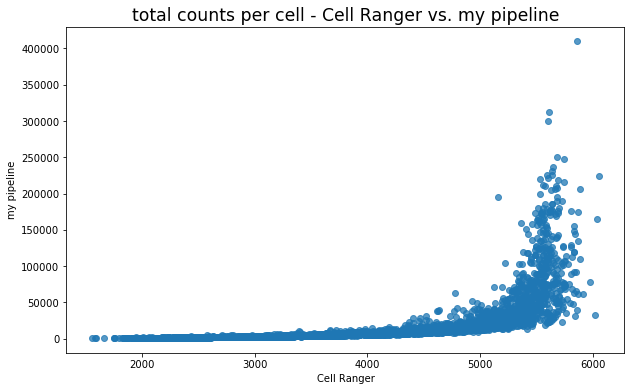

In [30]:
fig, axes = plt.subplots(1,1, figsize = (10,6))

fig.subplots_adjust(hspace=0.3)
axes.set_title("total counts per cell - Cell Ranger vs. my pipeline", size='xx-large')

axes.scatter(sub_cells_match_drop.obs["orig_counts"], sub_cells_match_drop.obs["total_counts"], cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes.set_ylabel("my pipeline")
axes.set_xlabel("Cell Ranger")

# plt.savefig('my_pip_vs_cell_ranger.png', dpi=500, bbox_inches='tight')

# graphics - summaries

In [ ]:
fig, axes = plt.subplots(2,3, figsize = (16,6))

# without dropseq tool
axes[0][0].set_title("'my pipeline'", size='xx-large')


axes[1][0].hist(dge_my_pip.obs['total_counts'], 5, histtype='bar', rwidth=0.5, align='left')
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_ylabel("frequency")
axes[1][0].set_xlabel("total counts")

# with dropseq tool
axes[0][1].set_title("'my pipeline + drop-seq tool'", size='xx-large')

axes[1][1].hist(sp_dge.obs['total_counts'], 5, histtype='bar', rwidth=0.5, align='left')
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_ylabel("frequency")
axes[1][1].set_xlabel("total counts")

# original matrix
axes[0][2].set_title("'Cell Ranger'", size='xx-large')

axes[1][2].hist(dge_orig.obs['total_counts'], 5, histtype='bar', rwidth=0.5, align='left')
axes[1][2].set_yscale('log')
axes[1][2].set_xscale('log')
axes[1][2].set_ylabel("frequency")
axes[1][2].set_xlabel("total counts")

plt.savefig('slide_1', dpi=500)

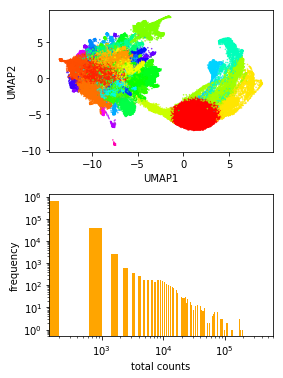

In [33]:
fig, axes = plt.subplots(2,1, figsize = (4,6))
fig.subplots_adjust(hspace=0.3)
axes[0].scatter(u1_my, u2_my, s=0.4, c=cluster_no_my, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[0].set_ylabel("UMAP2")
axes[0].set_xlabel("UMAP1")

axes[1].hist(sp_dge.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel("frequency")
axes[1].set_xlabel("total counts")

plt.savefig('my_pip_dropseqtools.png', dpi=500, bbox_inches='tight')

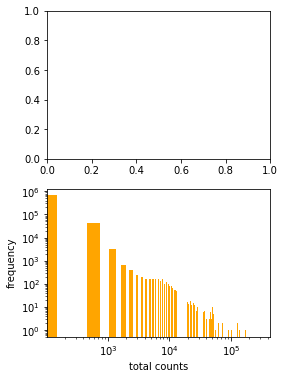

In [6]:
fig, axes = plt.subplots(2,1, figsize = (4,6))
# fig.subplots_adjust(hspace=0.3)
# axes[0].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
#             edgecolor=None, linewidth=1, alpha=0.75)
# axes[0].set_ylabel("UMAP2")
# axes[0].set_xlabel("UMAP1")

axes[1].hist(dge_my_pip.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel("frequency")
axes[1].set_xlabel("total counts")

plt.savefig('my_pip_no_dropseqtools.png', dpi=500, bbox_inches='tight')

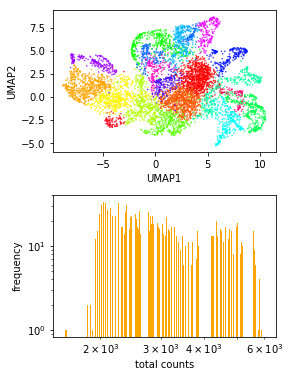

In [42]:
fig, axes = plt.subplots(2,1, figsize = (4,6))
fig.subplots_adjust(hspace=0.3)
axes[0].scatter(u1, u2, s=0.4, c=leiden, cmap='hsv', 
            edgecolor=None, linewidth=1, alpha=0.75)
axes[0].set_ylabel("UMAP2")
axes[0].set_xlabel("UMAP1")

axes[1].hist(dge_orig.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left', color="orange")
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_ylabel("frequency")
axes[1].set_xlabel("total counts")

plt.savefig('original.png', dpi=500, bbox_inches='tight')

In [104]:
lower_lim = dge_my_pip.obs['total_counts'] > 0
upper_lim = dge_my_pip.obs['total_counts'] < 10000
dge_my_pip.obs['keep'] = lower_lim & upper_lim
print(sum(dge_my_pip.obs["keep"]))
plot_my = dge_my_pip[dge_my_pip.obs['keep'] == True,]

672268


Text(0.5, 1.0, 'total counts')

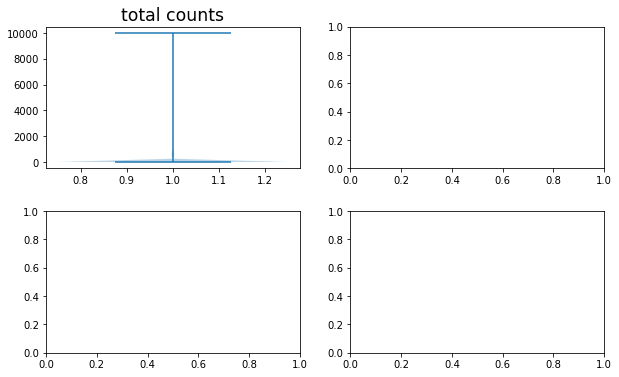

In [105]:
fig, axes = plt.subplots(2,2, figsize = (10, 6))
fig.subplots_adjust(hspace=0.3)
#--------------
#my pipeline

axes[0][0].violinplot(plot_my.obs['total_counts'], points=40, widths=0.5, 
                      bw_method='silverman')
axes[0][0].set_title("total counts", size='xx-large')

# axes[0][1].violinplot(dge_my_pip.obs['n_genes_by_counts'], points=40, widths=0.5, 
#                       bw_method='silverman')
# axes[0][1].set_title("no. genes per count", size='xx-large')

#--------------
#my pipeline + dropseq tool

# axes[1][0].violinplot(sp_dge.obs['total_counts'], points=40, widths=0.5, 
#                       bw_method='silverman')

# axes[1][1].violinplot(sp_dge.obs['n_genes_by_counts'], points=40, widths=0.5, 
#                       bw_method='silverman')


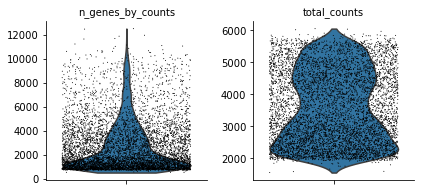

In [108]:
sc.pl.violin(dge_orig, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

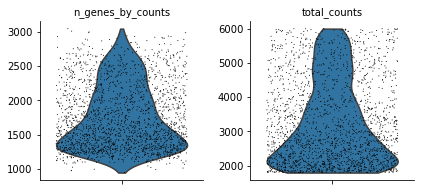

In [109]:
sc.pl.violin(mp_3, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.violin(mp_3, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)

# Utility methods

In [6]:
def correct_barcode_names(AnnData_object):
    """corrects the barcode names of an AnnData_object. In this particular case, the barcodes
    have the structure 'ACTACTAACCT-32'. This funtion changes this to 'ACTACTAACCT', saves it
    in the input AnnData_object and returns it."""
    
    genes = AnnData_object.obs_names.tolist()
    genes_new = []
    for gene in genes:
        genes_new.append(gene.split("-")[0])
    AnnData_object.obs_names = genes_new
    
    return AnnData_object

def get_umap_data(anndata_object):
    """extracts and returns UMAP data that is stored in a anndata_object"""
    
    length = len(anndata_object.obsm["X_umap"])
    u1_my = [0]*length
    u2_my = [0]*length

    for i in range(length):
        u1_my[i] = anndata_object.obsm["X_umap"][i][0]
        u2_my[i] = anndata_object.obsm["X_umap"][i][1]
        
    return u1_my, u2_my


def get_leiden_clustering_data(anndata_object):
    """extracts and returns leiden clustering data that is stored in a anndata_object"""
    
    length = len(anndata_object.obs)
    cluster_no_my = [0]*length

    for i in range(length):
        cluster_no_my[i] = int(anndata_object.obs['leiden'][i])
    
    return cluster_no_my

def gene_thresholding(anndata_object, threshold):
    """returns a boolean vector with True meaning that the cell has more genes expressed than threshold"""
    
    accepted = [False]*len(anndata_object.obs)
    i = 0
    for expr_genes in anndata_object.obs['n_genes_by_counts']:
        if expr_genes >= threshold:
            accepted[i] = True
        i += 1
    return accepted


#############################################
##### for converting gene_symbols to gene_ids
#############################################

def find_id(query):
    """getting a query result, extracting the 'appropriate' gene_id and returning it
    as a string"""
    
    gene_id = 'empty'
    
    if len(query['hits']) == 0: # are there no hits at all?
        pass
    else:
        for hit in query['hits']: # does the id actually start with AT?
            if hit['_id'][0:2] == 'AT' and len(hit['_id']) == 9:
                gene_id = hit['_id']
                break
      
    return gene_id


def get_gene_id(gene_symbol):
    """gets the gene_id for a gene_symbol by quering database using mygene package and returning the
    result as a string"""
    
    mg = mygene.MyGeneInfo()
    gene_id = "empty"
    
    if gene_symbol[0:2] == 'AT' and len(gene_symbol) == 9: # is conversion necessary at all?
        gene_id = gene_symbol
    else:
        try: # is there a httpError occuring?
            query = mg.query(gene_symbol, species='thale-cress')
        except:
            pass # if yes return gene_id (see below)
        else: # if no, find the id if it existsgene_id = find_id(query)
            gene_id = find_id(query)
    
    return gene_id


def symbol_to_id(gene_symbol_list):
    """get the gene_id for all gene_symbols in gene_symbol_list and return as a list"""
    
    gene_ids = [0]*len(gene_symbol_list)
    
    for i in range(len(gene_symbol_list)):
        gene_ids[i] = get_gene_id(gene_symbol_list[i])
    
    return gene_ids